In [27]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, ensemble, model_selection,preprocessing, datasets, metrics
from scipy import special

In [2]:
# 使用红酒数据对这种算法进行对比
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = model_selection.train_test_split(wine.data, wine.target, test_size=0.3)
clf = tree.DecisionTreeClassifier(random_state=66).fit(X_train, y_train)
rfc = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
score_d = clf.score(X_test, y_test)
score_f = rfc.score(X_test, y_test)
print('决策树的准确率：%f, 随机森林的准确率：%f' % (score_d, score_f))

决策树的准确率：0.833333, 随机森林的准确率：0.962963


Decision tree的准确率为：0.877341
RandomForest的准确率为：0.983333


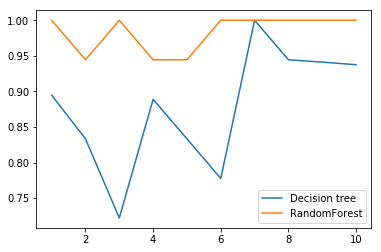

In [6]:
# 决策树和随机森林在交叉验证下的对比
clf = tree.DecisionTreeClassifier(random_state=10)
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=10)
label = 'Decision tree'
for model in [clf, rfc]:
    score = model_selection.cross_val_score(model, wine.data, wine.target, cv = 10)
    print('%s的准确率为：%f' % (label, score.mean()))
    plt.plot(range(1, 11), score, label=label)
    plt.legend()
    label = 'RandomForest'
plt.show()

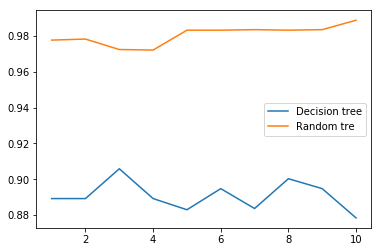

In [8]:
# 10组交叉验证下效果的对比
clf_score = []
rfc_score = []
for i in range(10):
    clf = tree.DecisionTreeClassifier()
    score = model_selection.cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_score.append(score)
    
    # 随机森林
    rfc = ensemble.RandomForestClassifier(n_estimators=100,)
    score = model_selection.cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_score.append(score)

plt.plot(range(1, 11), clf_score, label='Decision tree')
plt.plot(range(1, 11), rfc_score, label='Random tre')
plt.legend()
plt.show()
    

0.9888888888888889 551


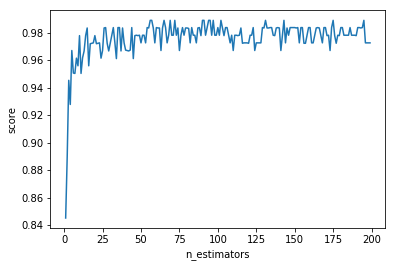

In [6]:
# n_estimators的学习曲线
rfc_score = []
for i in range(1, 200):
    rfc = ensemble.RandomForestClassifier(n_estimators=i)
    score_mean = model_selection.cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
#     score = rfc.score(X_test, y_test)
    rfc_score.append(score_mean)
# print('在%d个估算器下准确率最大，最大准确率为：%f' % (rfc_score.index(max(rfc_score)) * 10 + 1, max(rfc_score))
print(max(rfc_score),rfc_score.index(max(rfc_score)) * 10 + 1 )
plt.plot(range(1, 200), rfc_score)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

In [7]:
# 使用袋外数据进行测试
rfc = ensemble.RandomForestClassifier(n_estimators=30, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)
# 袋外数据的准确率
rfc.oob_score_

0.9719101123595506

In [8]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1357025772, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=55273721, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weig

In [10]:
# 随机森林的重要接口 feature_importances_ apply predict predict_proba
rfc = ensemble.RandomForestClassifier(n_estimators=30).fit(X_train, y_train)
score = rfc.score(X_test, y_test)
rfc.feature_importances_

array([0.12569564, 0.02028986, 0.01108227, 0.03304161, 0.04293141,
       0.07656672, 0.18664086, 0.00388348, 0.01711648, 0.12643743,
       0.05560933, 0.10854524, 0.19215968])

In [11]:
# 返回决策树上索引
rfc.apply(X_test)

array([[11,  3,  9, ..., 17,  3,  4],
       [11,  5,  4, ...,  8,  7,  4],
       [20, 14, 16, ..., 21, 14, 18],
       ...,
       [19,  5, 13, ...,  8,  7, 13],
       [ 5,  5,  4, ...,  8,  7,  4],
       [ 9,  5,  6, ..., 14,  3, 11]])

In [12]:
# 预测样本所属的分类
rfc.predict(X_test)

array([2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 2])

In [13]:
# 预测样本所属分类的概率
rfc.predict_proba(X_test)

array([[0.03333333, 0.13333333, 0.83333333],
       [0.03333333, 0.93333333, 0.03333333],
       [0.96666667, 0.03333333, 0.        ],
       [0.96666667, 0.03333333, 0.        ],
       [0.86666667, 0.1       , 0.03333333],
       [0.        , 0.96666667, 0.03333333],
       [0.        , 0.06666667, 0.93333333],
       [0.        , 0.        , 1.        ],
       [0.9       , 0.1       , 0.        ],
       [0.96666667, 0.03333333, 0.        ],
       [0.03333333, 0.93333333, 0.03333333],
       [0.03333333, 0.4       , 0.56666667],
       [0.        , 0.06666667, 0.93333333],
       [0.        , 0.1       , 0.9       ],
       [0.73333333, 0.23333333, 0.03333333],
       [0.06666667, 0.76666667, 0.16666667],
       [0.96666667, 0.        , 0.03333333],
       [0.03333333, 0.96666667, 0.        ],
       [0.83333333, 0.13333333, 0.03333333],
       [0.03333333, 0.66666667, 0.3       ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

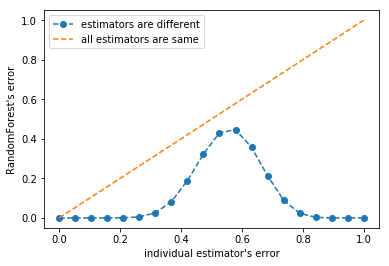

In [24]:
# 袋装法的一个必要条件：基分类器的判断准确率至少要超过随机分类器，也是说基分类器的判断准确率至少要大于50%
# 接下来我们看一下基分类器的误差和随机森林的误差之间的图像
x = np.linspace(0, 1, 20)
y = []
for error in np.linspace(0, 1, 20):
    E = np.array([special.comb(25, i)*(error**i)*((1 - error)**(25-i)) for i in range(13, 16)]).sum()
    y.append(E)
plt.plot(x, y, 'o--', label='estimators are different')
plt.plot(x, x, '--', label='all estimators are same')
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [26]:
# 随机森林回归
boston = datasets.load_boston()
regressor = ensemble.RandomForestRegressor(n_estimators=30, random_state=30)
# 返回的负的均方误差
model_selection.cross_val_score(regressor, 
                                        boston.data, 
                                        boston.target, 
                                        cv=10, 
                                        scoring='neg_mean_squared_error')

array([-11.2679085 ,  -5.73942418,  -5.44783987, -22.41086144,
       -12.55789194, -17.08107037,  -7.25691067, -95.39511511,
       -33.97891311, -14.49350378])

In [28]:
# scoring 所有的取值可能
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [1]:
# apply 接口返回测试集中每一个样本在每一颗树所在的叶子索引